# Project 3 - Part 4: Hypothesis Testing

In [9]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
## fixing random for lesson generation
np.random.seed(321)
import glob

from scipy import stats
import scipy
scipy.__version__

'1.9.3'

### 📚 Finding & Loading Batches of Files with `glob`

In [2]:
import os
FOLDER = 'Data/'
file_list = sorted(os.listdir(FOLDER))
file_list

['.DS_Store',
 '.ipynb_checkpoints',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'title_akas.csv',
 'title_akas.csv.gz',
 'title_basics.csv.gz',
 'title_ratings.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2009.json',
 'tmdb_api_results_2010.json',
 'tmdb_api_results_2011.json',
 'tmdb_api_results_2012.json',
 'tmdb_api_results_2013.json',
 'tmdb_api_results_2014.json',
 'tmdb_api_results_2015.json',
 'tmdb_api_results_2016.json',
 'tmdb_api_results_2017.json',
 'tmdb_api_results_2018.json',
 'tmdb_api_results_2019.json',
 'tmdb_results_combined.csv.gz']

In [3]:
## Make a filepath query
q = FOLDER+"/**/final_*.csv.gz"
print(q)

Data//**/final_*.csv.gz


In [4]:
file_list = sorted(glob.glob(q,recursive=True))
file_list

['Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2009.csv.gz',
 'Data/final_tmdb_data_2010.csv.gz',
 'Data/final_tmdb_data_2011.csv.gz',
 'Data/final_tmdb_data_2012.csv.gz',
 'Data/final_tmdb_data_2013.csv.gz',
 'Data/final_tmdb_data_2014.csv.gz',
 'Data/final_tmdb_data_2015.csv.gz',
 'Data/final_tmdb_data_2016.csv.gz',
 'Data/final_tmdb_data_2017.csv.gz',
 'Data/final_tmdb_data_2018.csv.gz',
 'Data/final_tmdb_data_2019.csv.gz']

In [5]:
## use a list comprehension to load in all files into 1 dataframe
df = pd.concat([pd.read_csv(f,lineterminator='\n') for f in file_list])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.113,2140.0,PG


In [6]:
# remove ids that are 0
df = df.loc[ df['imdb_id']!='0']
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.113,2140.0,PG
5,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.796,49.0,R


In [7]:
df = df.reset_index(drop=True)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.113,2140.0,PG
4,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.796,49.0,R


In [8]:
## Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','tagline','id','homepage', 'status',
                 'production_countries','video','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.635,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.910,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...",2000-11-15,0.0,100.0,For the Cause,5.100,8.0,NaN
2,tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",1.199,[],2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN
3,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",29.240,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...",2000-09-29,12854953.0,99.0,In the Mood for Love,8.113,2140.0,PG
4,tt0118852,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",3.881,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...",2000-09-02,0.0,99.0,Chinese Coffee,6.796,49.0,R


## Q1. does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

### State the Hypothesis & Null Hypothesis
<br>
- $H_0$ (Null Hypothesis):no difference in revenue between betrween rating groups
<br>
- $H_A$ (Alternative Hypothesis):  There is a significant difference in revenue between rating groups

### Determine the correct test to perform.
- Type of Data? ```numerical```
- How many groups/samples? more than two  
- Therefore, which test is appropriate? ANOVA

### Testing Assumptions
> ```According with the workflow, the ANOVA Test has the following assumptions:```
- No significant outliers
- Equal variance
- Normality

In [11]:
df['certification'].value_counts()

R          3890
NR         2495
PG-13      2080
PG          921
G           319
NC-17       115
Unrated       5
-             1
PG-13         1
10            1
Name: certification, dtype: int64

### Cleaning Certification
- Genres: get just name and OHE
- Cleaning Certification
- Converting release date to year, month, and day.

In [13]:
# fix extra space certs
df['certification'] = df['certification'].str.strip()

In [14]:
## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      33008
R         3890
NR        2501
PG-13     2081
PG         921
G          319
NC-17      115
Name: certification, dtype: int64

In [16]:
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df.head(2)

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,certification,year,month,day
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.635,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN,2000.0,9.0,22.0
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.910,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...",2000-11-15,0.0,100.0,For the Cause,5.1,8.0,NaN,2000.0,11.0,15.0


In [17]:
df[df['release_date'].isna()]

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,certification,year,month,day
120,tt0164182,0.0,NaN,0.0,[],0.6,[],NaN,0.0,0.0,The Stonecutter,0.0,0.0,NaN,NaN,NaN,NaN
841,tt0250944,0.0,NaN,0.0,[],0.6,[],NaN,0.0,0.0,The Adventures of Cinderella's Daughter,0.0,0.0,NaN,NaN,NaN,NaN
953,tt0264927,0.0,NaN,0.0,"[{'id': 9648, 'name': 'Mystery'}]",0.6,[],NaN,0.0,93.0,Movievoyeur.com,0.0,0.0,NaN,NaN,NaN,NaN
1018,tt0273514,0.0,NaN,0.0,[],0.6,[],NaN,0.0,90.0,The Cutting,0.0,0.0,NaN,NaN,NaN,NaN
1158,tt0489447,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",0.6,[],NaN,0.0,87.0,The Bags,4.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42627,tt9740272,0.0,NaN,0.0,[],0.6,[],NaN,0.0,0.0,Nauker Vahuti Da,0.0,0.0,NaN,NaN,NaN,NaN
42677,tt9787862,0.0,NaN,8000.0,"[{'id': 35, 'name': 'Comedy'}]",0.6,[],NaN,0.0,73.0,The Silver Screen Roadshow,0.0,0.0,NaN,NaN,NaN,NaN
42742,tt9842970,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",0.6,[],NaN,0.0,127.0,Punks,0.0,0.0,NaN,NaN,NaN,NaN
42794,tt9881572,0.0,NaN,10000.0,[],0.6,[],NaN,0.0,100.0,Noose,0.0,0.0,NaN,NaN,NaN,NaN


In [18]:
## drop original feature
df = df.drop(columns=['release_date'])

In [20]:
## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [22]:
## Use ourn function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode.head(2)

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,production_companies,revenue,runtime,title,vote_average,vote_count,certification,year,month,day,genres_list
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.635,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",0.0,86.0,The Fantasticks,5.5,22.0,NaN,2000.0,9.0,22.0,Comedy
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.635,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",0.0,86.0,The Fantasticks,5.5,22.0,NaN,2000.0,9.0,22.0,Music


In [23]:
## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Comedy', 'Music', 'Romance', 'Science Fiction', 'Drama', 'Action',
       'Crime', 'Adventure', 'Animation', 'Fantasy', 'Horror', 'Thriller',
       'History', 'Family', 'Mystery', 'Western', 'War', 'TV Movie',
       'Documentary'], dtype=object)

In [24]:
## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex=False)    
df.head(2)

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,production_companies,revenue,runtime,title,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.635,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",0.0,86.0,The Fantasticks,...,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.910,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...",0.0,100.0,For the Cause,...,False,False,False,False,False,False,False,False,False,False


In [25]:
## Drop original genre cols
df = df.drop(columns=['genres','genres_list'])
df.head(2)

,imdb_id,adult,belongs_to_collection,budget,popularity,production_companies,revenue,runtime,title,vote_average,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,NaN,10000000.0,2.635,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",0.0,86.0,The Fantasticks,5.5,...,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,NaN,0.0,1.910,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...",0.0,100.0,For the Cause,5.1,...,False,False,False,False,False,False,False,False,False,False


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42835 entries, 0 to 42834
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                42835 non-null  object 
 1   adult                  42835 non-null  float64
 2   belongs_to_collection  2820 non-null   object 
 3   budget                 42835 non-null  float64
 4   popularity             42835 non-null  float64
 5   production_companies   42835 non-null  object 
 6   revenue                42835 non-null  float64
 7   runtime                42835 non-null  float64
 8   title                  42835 non-null  object 
 9   vote_average           42835 non-null  float64
 10  vote_count             42835 non-null  float64
 11  certification          9827 non-null   object 
 12  year                   42226 non-null  float64
 13  month                  42226 non-null  float64
 14  day                    42226 non-null  float64
 15  Ge

In [28]:
df['certification'].value_counts()

R        3890
NR       2501
PG-13    2081
PG        921
G         319
NC-17     115
Name: certification, dtype: int64

### Visualize and separate data for hypothesis

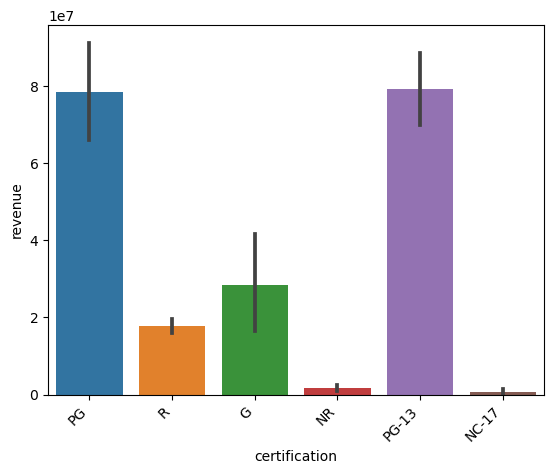

In [29]:
ax = sns.barplot(data=df, x='certification', y='revenue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [30]:
needed_cols = ['certification','revenue']
df[needed_cols]

,certification,revenue
0,NaN,0.0
1,NaN,0.0
2,NaN,0.0
3,PG,12854953.0
4,R,0.0
...,...,...
42830,NaN,0.0
42831,NaN,0.0
42832,NaN,0.0
42833,NaN,0.0


In [32]:
## Create a dictionary with each group as key and charges as values
groups ={}

for r in df['certification'].unique():
    temp = df.loc[df['certification']== r, 'revenue']
    groups[r] = temp

groups.keys()

dict_keys([nan, 'PG', 'R', 'G', 'NR', 'PG-13', 'NC-17'])

In [33]:
groups['R']

4              0.0
5              0.0
6              0.0
10         14904.0
15        105983.0
           ...    
42496      92968.0
42624          0.0
42685    1964806.0
42728      15712.0
42733          0.0
Name: revenue, Length: 3890, dtype: float64

### Testing Assumptions

#### Checking Assumption of No Sig. Outliers

In [35]:
## Loop through groups dict
for r, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {r} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[r] = data

There were 0 outliers in the nan group.
There were 25 outliers in the PG group.
There were 86 outliers in the R group.
There were 8 outliers in the G group.
There were 24 outliers in the NR group.
There were 54 outliers in the PG-13 group.
There were 1 outliers in the NC-17 group.


#### Test for Normality

In [36]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for r, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([r,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

/Users/rodrigoarguelloserrano/miniconda3/envs/dojo-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1343: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
/Users/rodrigoarguelloserrano/miniconda3/envs/dojo-env/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/rodrigoarguelloserrano/miniconda3/envs/dojo-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rodrigoarguelloserrano/miniconda3/envs/dojo-env/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: skewtest is not valid with less than 8 samples; 0 samples were given.

In [37]:
data

Series([], Name: revenue, dtype: float64)